<a href="https://colab.research.google.com/github/long-sleeper/diveintocode-ml/blob/master/term2/Sprint19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sprint セグメンテーション1

### ＜目的＞
- コンピュータビジョンの代表的タスクであるセグメンテーションを学ぶ  

### ＜セグメンテーション＞

KaggleのTGS Salt Identification Challengeのデータセットを使用し、セグメンテーションを行います。

TGS Salt Identification Challenge | Kaggle

セグメンテーション手法としてU-Net[1]を使います。

[1]O.Ronneberger, P.Fischer, T.Brox. U-Net: Convolutional Networks for Biomedical Image Segmentation. Medical Image Computing and Computer-Assisted Intervention (MICCAI), Springer, LNCS, Vol.9351: 234–241, 2015

https://arxiv.org/pdf/1505.04597.pdf



### 【問題1】学習・推定
以下のKeras実装を使用して学習・推定を行ってください。

zhixuhao/unet: unet for image segmentation

《GPU環境での学習》  
大規模なデータセット、大きなモデルになるため、GPUを使用する必要があります。  

《新たなデータセットの適用》  
公開されている実装で用意されたものとは異なるデータセットを入力するための準備が必要です。

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
!unzip /content/drive/'My Drive'/'TGS Salt Identification'/train.zip

unzip:  cannot find or open /content/drive/My Drive/TGS Salt Identification/train.zip, /content/drive/My Drive/TGS Salt Identification/train.zip.zip or /content/drive/My Drive/TGS Salt Identification/train.zip.ZIP.


In [ ]:
!unzip /content/drive/'My Drive'/unet/'TGS Salt Identification'/test.zip

unzip:  cannot find or open /content/drive/My Drive/unet/TGS Salt Identification/test.zip, /content/drive/My Drive/unet/TGS Salt Identification/test.zip.zip or /content/drive/My Drive/unet/TGS Salt Identification/test.zip.ZIP.


In [ ]:
import tensorflow
tensorflow.__version__

'2.2.0'

In [ ]:
!git clone https://github.com/zhixuhao/unet.git

Cloning into 'unet'...
remote: Enumerating objects: 394, done.
remote: Total 394 (delta 0), reused 0 (delta 0), pack-reused 394
Receiving objects: 100% (394/394), 44.92 MiB | 7.27 MiB/s, done.
Resolving deltas: 100% (79/79), done.


In [ ]:
% cd /content/drive/My Drive/Segmentation/unet

/content/drive/My Drive/Segmentation/unet


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

In [ ]:
img_path = '/content/drive/My Drive/Segmentation/unet/TGS Salt Identification/train/images'
img_list = glob.glob(img_path + '/*' + ".png")

mask_path = '/content/drive/My Drive/Segmentation/unet/TGS Salt Identification/train/masks'
mask_list = glob.glob(mask_path + '/*' + ".png")

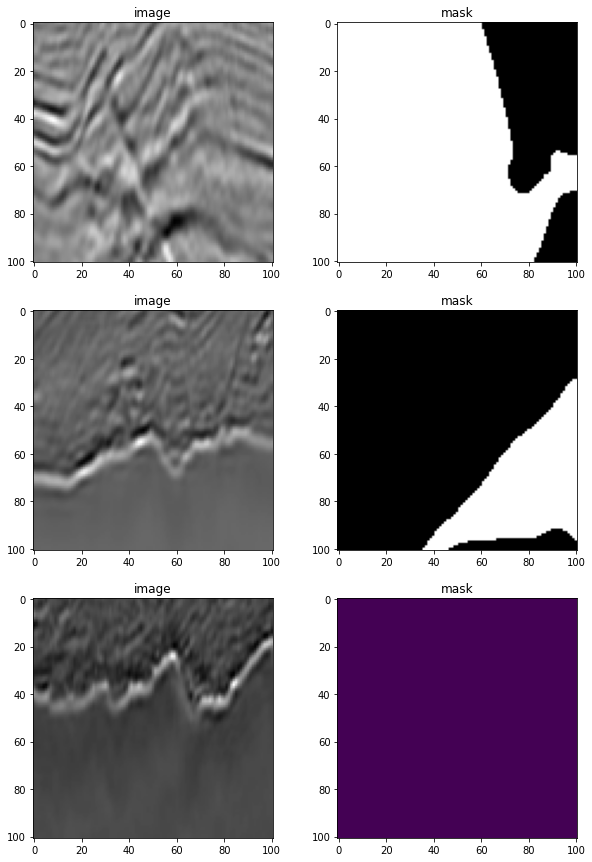

In [ ]:
plt.figure(figsize=(10,15))
for i in range(3):
  img = Image.open(img_list[i])
  mask = Image.open(mask_list[i])
  plt.subplot(3,2,1+2*i)
  plt.imshow(img)
  plt.title('image')
  plt.subplot(3,2,2+2*i)
  plt.imshow(mask)
  plt.title('mask')

In [ ]:
# shape確認

import numpy as np

img = Image.open(img_list[0])
img = np.array(img)
mask = Image.open(mask_list[0])
mask = np.array(mask)

print('image shape : ',img.shape)
print('mask shape : ',mask.shape)

image shape :  (101, 101, 3)
mask shape :  (101, 101)


imageは白黒に見えるが、3つのchanelがあるらしい

In [ ]:
# 配列確認
print('channel 1 :\n',img[:,:,0])
print('\nchannel 2 :\n',img[:,:,1])
print('\nchannel 3 :\n',img[:,:,2])

channel 1 :
 [[118 116 125 ... 149 158 152]
 [111 108 111 ... 134 143 142]
 [117 115 112 ... 118 125 123]
 ...
 [133 135 137 ... 125 142 144]
 [136 136 135 ... 113 136 146]
 [138 134 131 ... 105 125 138]]

channel 2 :
 [[118 116 125 ... 149 158 152]
 [111 108 111 ... 134 143 142]
 [117 115 112 ... 118 125 123]
 ...
 [133 135 137 ... 125 142 144]
 [136 136 135 ... 113 136 146]
 [138 134 131 ... 105 125 138]]

channel 3 :
 [[118 116 125 ... 149 158 152]
 [111 108 111 ... 134 143 142]
 [117 115 112 ... 118 125 123]
 ...
 [133 135 137 ... 125 142 144]
 [136 136 135 ... 113 136 146]
 [138 134 131 ... 105 125 138]]


3channelとも同じ配列になっているようだ

＜ソースコード編集＞
- main.pyのtrainGeneraterのpath変更
- main.pyのtestGeneraterのpath変更
- data.pyのtestGeneratorでファイル名を取得するように変更

In [ ]:
! python main.py

Using TensorFlow backend.
2020-07-06 04:08:22.110303: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-06 04:08:23.709384: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-06 04:08:23.755017: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-06 04:08:23.755669: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-07-06 04:08:23.755731: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-06 04:08:23.994467: I ten

In [ ]:
test_path = '/content/drive/My Drive/Segmentation/unet/TGS Salt Identification/test/images'
test_list = glob.glob(test_path + '/*' + ".png")

pred_path = '/content/drive/My Drive/Segmentation/unet/TGS Salt Identification/predict'
pred_list = glob.glob(pred_path + '/*' + ".png")

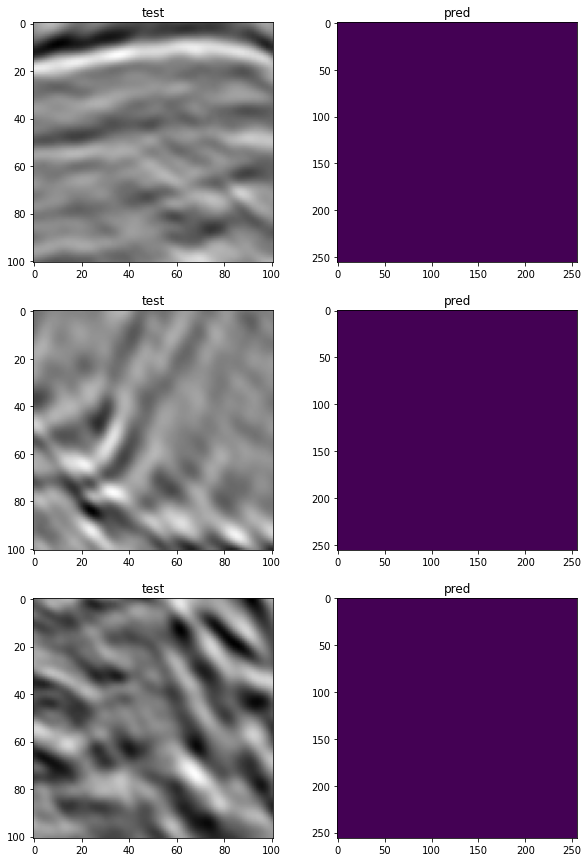

In [ ]:
plt.figure(figsize=(10,15))
for i in range(3):
  test = Image.open(test_list[i])
  pred = Image.open(pred_list[i])
  plt.subplot(3,2,1+2*i)
  plt.imshow(test)
  plt.title('test')
  plt.subplot(3,2,2+2*i)
  plt.imshow(pred)
  plt.title('pred')

何も学習・予測できていない



### 【問題2】コードリーディング  

論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

通常のCNNによって行われる画像のクラス分類（画像認識）では、畳み込み層が物体の局所的な特徴を抽出する役割を担い、プーリング層が物体の全体的な位置情報をぼかす（位置ズレの許容）の役割を担っている。そのため、より深い層ほど、抽出される特徴はより局所的になり、その特徴の全体的な位置情報はより曖昧になる。言い換えれると、プーリング層のおかげで、物体の位置ズレや大きさの違いの影響をあまり受けない、頑強なパターン認識が可能になっている。

一方、領域抽出では、「物体の局所的特徴と全体的位置情報」の両方を元画像上で特定しなければならない。つまり、プーリング層でぼかされた局所的特徴の位置情報を元画像上でpixel単位で正確に復元する必要がある。

そこで、「物体の局所的特徴と全体的位置情報」の両方を統合して学習させるために開発されたのがU-Netであり、図に示すようにU字型のネットワークになっていることから名付けられた。

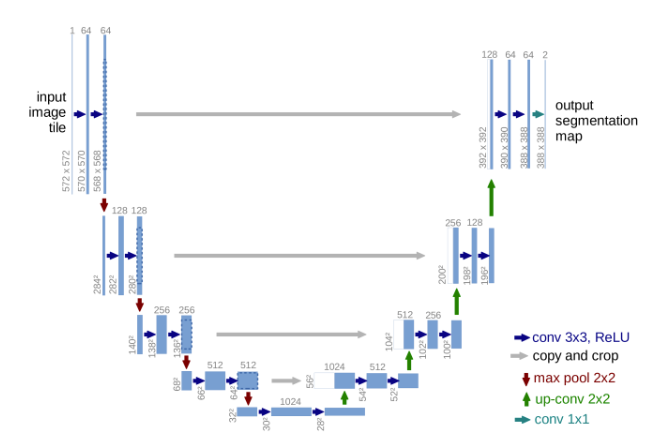

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/Sprint19/unet_1.png')

下向きパスは、「畳み込み＋プーリング」により、深い層ほど特徴が局所的で位置情報が曖昧に、浅い層ほど、特徴は全体的で位置情報は正確になる。一方、上向きパスは、「畳み込み＋upサンプリング」により、特徴を保持したまま、画像を大きく復元することができる。両方のパスにおいて、画像サイズが同じものを深い層から段階的に統合することによって、局所的特徴を保持したまま全体的位置情報の復元を行うことができる。

以下に、U-Netモデルで重要と思われる点を挙げていく。

1. U-Net  architecture 
- Up Sampling / deconvolution
- Merge / skip-conection
- FCN
2. feature channels
3. data augmentation

上記のそれぞれにつき、該当するコードを探す。


### 1. U-Net  architecture 

In [ ]:
def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

- Up Sampling / deconvolution  
``up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))``の部分。  
上向きパスにおける「Up-Sampling」と呼ばれる操作で、画像を復元する意味がある。画像を圧縮するプーリングの逆の効果を持つため「アンプーリング」とも呼ばれる。  
サイズ拡張にはピクセルの内挿計算が必要だが、ここでは通常用いられる最近傍補間や倍リニア補間は用いず、逆畳み込み演算によって補間している。


- Merge / skip-connection  
``merge6 = concatenate([drop4,up6], axis = 3)``の部分。  
文字通り情報を統合する意味がある。  
U-Netの下向きパスは、深い層ほど特徴が局所的で位置情報が曖昧に、浅い層ほど特徴は全体的で位置情報は正確になる。  
両方のパスで画像サイズが同じもの同士を深い層から段階的にマージすることにより、局所的特徴を保持したまま全体的位置情報の復元を可能にしている。  
特に、以前は違う層の特徴マップ同士をchannelごとの値の足し算で統合していたのに対し、U-NetではEncoderで出力された特徴マップを別channelとしてDecoderの特徴マップに``concatenate``する形で連結している。


- FNC  
fully convolutional networkの名の通り、上記の実装は畳み込み層のみで構成され、全結合層は含まれていない。  
クラス分類では全結合層が必要だが、segmentationでは画像が出力になるため全結合層が必要ない。  
出力層ではSigmoid関数が使用されており、出力は確率となるため、閾値を設けて白黒の二値画像として出力される。  
``conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)``の部分。

### 2. feature channels

In [ ]:
def adjustData(img,mask,flag_multi_class,num_class):
    if(flag_multi_class):
        img = img / 255
        mask = mask[:,:,:,0] if(len(mask.shape) == 4) else mask[:,:,0]
        new_mask = np.zeros(mask.shape + (num_class,))
        for i in range(num_class):
            #for one pixel in the image, find the class in mask and convert it into one-hot vector
            #index = np.where(mask == i)
            #index_mask = (index[0],index[1],index[2],np.zeros(len(index[0]),dtype = np.int64) + i) if (len(mask.shape) == 4) else (index[0],index[1],np.zeros(len(index[0]),dtype = np.int64) + i)
            #new_mask[index_mask] = 1
            new_mask[mask == i,i] = 1
        new_mask = np.reshape(new_mask,(new_mask.shape[0],new_mask.shape[1]*new_mask.shape[2],new_mask.shape[3])) if flag_multi_class else np.reshape(new_mask,(new_mask.shape[0]*new_mask.shape[1],new_mask.shape[2]))
        mask = new_mask
    elif(np.max(img) > 1):
        img = img / 255
        mask = mask /255
        mask[mask > 0.5] = 1
        mask[mask <= 0.5] = 0
    return (img,mask)


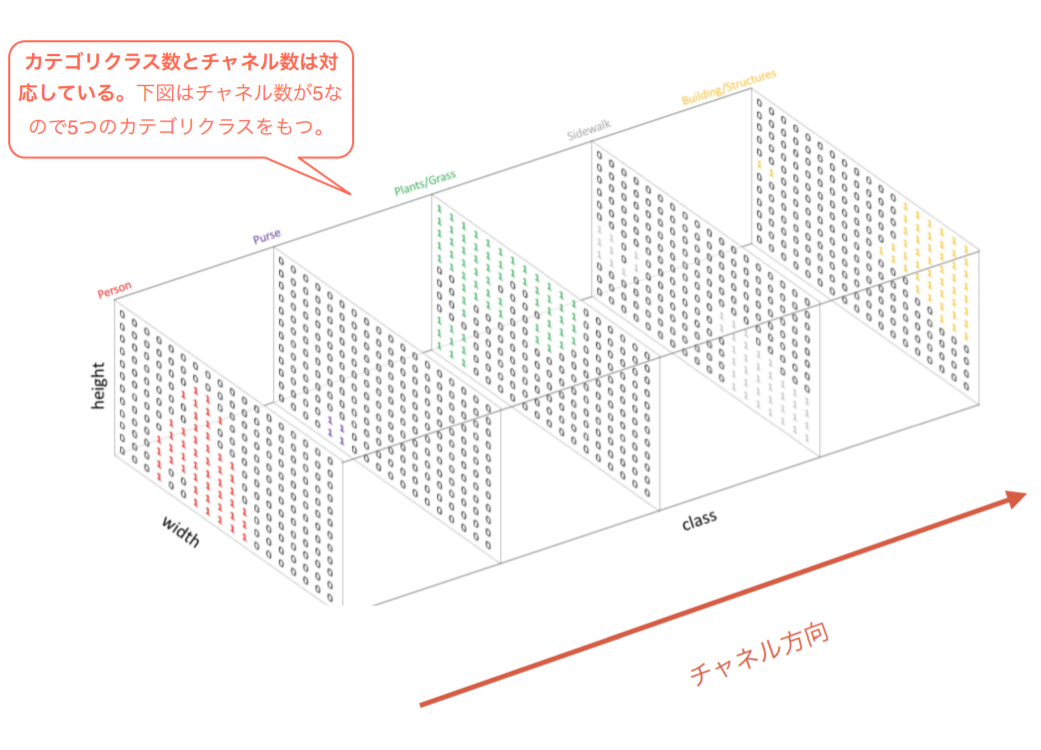

In [ ]:
Image('/content/drive/My Drive/Sprint19/unet_2.png')

U-Netに限ったことではないようだが、FNCでは全結合層がなくなったことにより、出力はpixel毎に各カテゴリに属する確率が割り当てられたfeature mapとなる。  
詳細はわからないが、上記コードの``flag_multi_class``と``num_class``の設定で、カテゴリ数分のchannelが作成されるものと考えられ、論文中でfeature channelsと呼ばれていた。

### 3. data augmentation

In [ ]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'TGS Salt Identification/train','images','masks',data_gen_args,save_to_dir = None)

segmentationの学習には多くの学習データが必要であるが、論文中で扱われていた電子顕微鏡画像など、特に医療分野等では大量の学習データの確保自体が難しい場合もある。  
そのため、上記コードにて主にspatial-levelな手法でデータ拡張されており、電子顕微鏡画像で観察されるであろう組織の変形に対してRobustな学習ができるものと考えられているようだ。